## Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet

## Importar dataset

In [53]:
df = pd.read_csv('data/powerconsumption.csv')

In [54]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [55]:
df.tail()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [56]:
df.shape

(52416, 9)

In [57]:
df.columns.to_list()

['Datetime',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'GeneralDiffuseFlows',
 'DiffuseFlows',
 'PowerConsumption_Zone1',
 'PowerConsumption_Zone2',
 'PowerConsumption_Zone3']

In [58]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [59]:
# Cambiar a datetime
df['Datetime'] = pd.to_datetime(df['Datetime'])

## Graficar distribución

<Axes: xlabel='Datetime', ylabel='PowerConsumption_Zone1'>

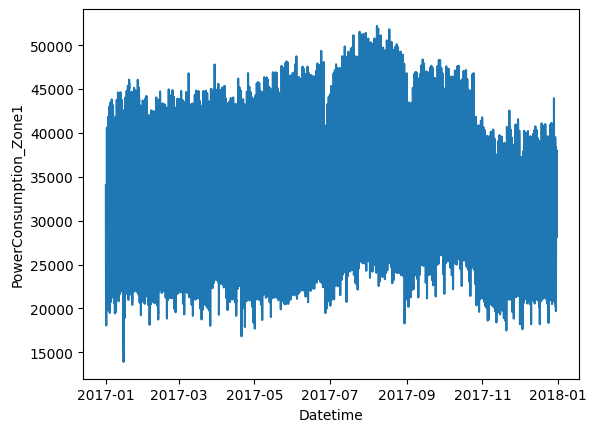

In [60]:
sns.lineplot(data=df, x='Datetime', y='PowerConsumption_Zone1')

In [61]:
# Hay demasiados datos temporales, voy a quedarme con solo un registro por día
df['MesDia'] = df['Datetime'].dt.month * 100 + df['Datetime'].dt.day

In [63]:
df.drop_duplicates(subset=['MesDia'], inplace=True)

In [65]:
df.drop('MesDia', axis=1, inplace=True)

In [67]:
df.reset_index()

,index,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0,2017-01-01,6.559,73.80,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,144,2017-01-02,11.010,75.80,0.076,0.033,0.163,26703.79747,18047.41641,17916.14458
2,288,2017-01-03,12.080,74.00,0.076,0.117,0.093,26661.26582,18579.93921,18072.28916
3,432,2017-01-04,8.520,83.70,0.077,0.062,0.104,27657.72152,18612.76596,18176.38554
4,576,2017-01-05,9.000,79.70,0.085,0.048,0.119,27663.79747,18948.32827,18344.09639
...,...,...,...,...,...,...,...,...,...,...
359,51696,2017-12-26,9.380,78.80,0.081,0.059,0.093,26968.82129,22818.04234,11893.39736
360,51840,2017-12-27,15.280,53.31,0.080,0.066,0.111,26853.23194,23112.61123,11772.38896
361,51984,2017-12-28,15.590,62.25,0.082,0.055,0.141,26938.40304,22943.23412,12095.07803
362,52128,2017-12-29,13.200,55.31,0.079,0.062,0.115,27266.92015,23517.64345,12008.64346


<Axes: >

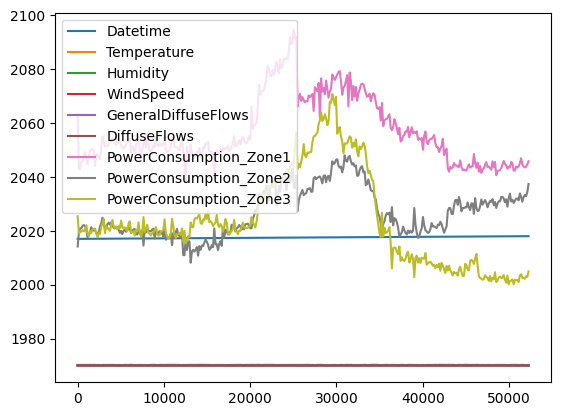

In [68]:
df.plot()